In [1]:
! nvidia-smi

Tue Mar  7 15:27:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [1]:
import cudf as cd
import cupy as cp
import cuml as cm

In [3]:
! pip install gdown==4.3.1

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.3.1-py3-none-any.whl size=14472 sha256=7565e0fc1d92c45cde6987750be0ab3d5970bf85e8a9ea5b6645590785f37207
  Stored in directory: /root/.cache/pip/wheels/39/13/56/88209f07bace2c1af0614ee3326de4a00aad74afb0f4be921d
Successfully built gdown


In [4]:
#!gdown --id 11AkiuLnL3XE3Jo0T8rxMgYSuEyMc2_C2

In [5]:
train_valid = cd.read_csv('/kaggle/working/overview-of-recordings.csv')
train_valid.head(2)

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126


In [6]:
#!gdown --id 1-BJL5O4qfO-hWd76mG5mIhYQMx3kaJ3Z

In [7]:
#! unzip "/kaggle/working/train.zip" -d train 

In [8]:
df= train_valid[["file_name","phrase","prompt"]].copy()
print(df.shape)
df.head(2)

(6661, 3)


,file_name,phrase,prompt
0,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain
1,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out


In [9]:
import os

# folder path
dir_path = r'/kaggle/working/train/train'

# list to store files
file_names = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        file_names.append(path)
print(len(file_names))

1038


In [10]:
file_names

['1249120_44220382_62940465.wav',
 '1249120_13842059_19662889.wav',
 '1249120_1853182_104613772.wav',
 '1249120_17632529_14316206.wav',
 '1249120_2171654_61628879.wav',
 '1249120_13842059_99076771.wav',
 '1249120_44142156_92669868.wav',
 '1249120_15004831_16727782.wav',
 '1249120_1853182_105033949.wav',
 '1249120_1853182_28883766.wav',
 '1249120_19425875_56371974.wav',
 '1249120_15004831_21919890.wav',
 '1249120_44220382_93846550.wav',
 '1249120_18386513_32736522.wav',
 '1249120_15830408_94297385.wav',
 '1249120_44235678_98666570.wav',
 '1249120_17632529_75928927.wav',
 '1249120_44246595_36064910.wav',
 '1249120_15004831_53829738.wav',
 '1249120_44188922_16615356.wav',
 '1249120_44246595_27538143.wav',
 '1249120_44142156_92200558.wav',
 '1249120_18172663_40838773.wav',
 '1249120_1853182_87966641.wav',
 '1249120_15965551_65155573.wav',
 '1249120_17632529_10666453.wav',
 '1249120_13842059_19948105.wav',
 '1249120_18172663_76673453.wav',
 '1249120_18386513_93250733.wav',
 '1249120_1500483

In [11]:
new_df=df.loc[df['file_name'].isin(file_names)]
print(new_df.shape)
new_df.head(2)

(1038, 3)


,file_name,phrase,prompt
7,1249120_15004831_21919890.wav,I have cut my finger because of playing footba...,Injury from sports
8,1249120_14353703_93481996.wav,I have acne in my face and other problems in m...,Skin issue


In [12]:
new_df.isnull().sum()

file_name    0
phrase       0
prompt       0
dtype: uint64

In [13]:
new_df= new_df.drop_duplicates()

In [14]:
print(new_df.shape)

(1038, 3)


In [15]:
new_df['prompt'].value_counts()

Heart hurts           67
Acne                  62
Shoulder pain         60
Muscle pain           57
Hair falling out      48
Joint pain            48
Feeling cold          46
Hard to breath        46
Blurry vision         46
Injury from sports    45
Neck pain             42
Feeling dizzy         39
Knee pain             39
Internal pain         37
Ear ache              36
Foot ache             35
Infected wound        34
Head ache             33
Emotional pain        33
Cough                 33
Back pain             33
Stomach ache          32
Body feels weak       31
Skin issue            29
Open wound            27
Name: prompt, dtype: int32

In [16]:
type(new_df)

cudf.core.dataframe.DataFrame

<AxesSubplot:xlabel='prompt', ylabel='count'>

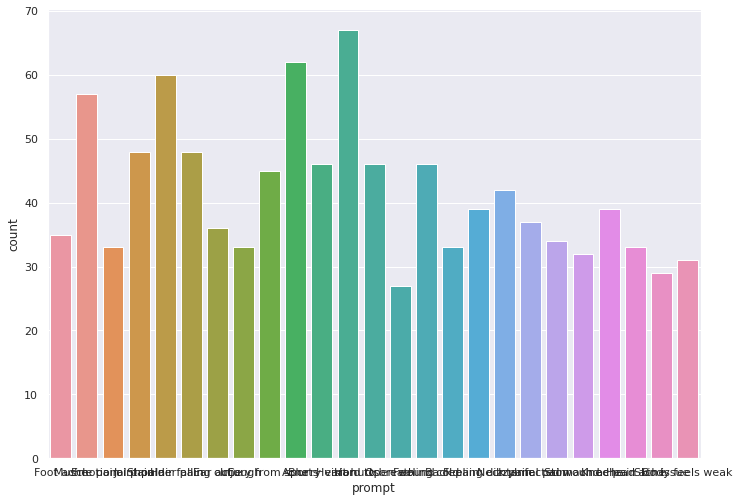

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='prompt', data=new_df.to_pandas())

In [18]:
y = new_df["prompt"]
X = new_df[["phrase"]]

In [19]:
X.head(1)

,phrase
6609,I have a painful cramp in my feet


In [20]:
y.head(1)

6609    Foot ache
Name: prompt, dtype: object

#Data Prepration - Text Preprocessing

In [21]:
from cuml.feature_extraction.text import HashingVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = HashingVectorizer(n_features=2**4)
vect = vectorizer.fit_transform(cd.Series(corpus))
print(vect.shape)

(4, 16)


In [22]:
vect

In [23]:
vect.shape

(4, 16)

In [24]:
vect.format

'csr'

In [25]:
vect.data

array([ 0.57735026,  0.57735026,  0.        ,  0.57735026,  0.5       ,
        0.5       ,  0.5       , -0.5       , -0.40824828,  0.40824828,
        0.40824828, -0.40824828,  0.40824828,  0.40824828,  0.57735026,
        0.57735026,  0.        ,  0.57735026], dtype=float32)

In [26]:
import numpy as np
import pandas as pd

In [27]:
0.57735026+0.40824828

0.98559854

In [28]:
pd.DataFrame(vect.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.57735026,0.0,0.0,0.0,0.0,0.57735026,0.0,0.0,0.0,0.0,0.57735026,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.5,-0.5,0.0,0.0,0.0
2,0.0,0.0,-0.40824828,0.0,0.0,0.40824828,0.40824828,0.0,0.0,-0.40824828,0.0,0.40824828,0.40824828,0.0,0.0,0.0
3,0.0,0.57735026,0.0,0.0,0.0,0.0,0.57735026,0.0,0.0,0.0,0.0,0.57735026,0.0,0.0,0.0,0.0


#Topic modeling using bertopic

In [29]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=3426787 sha256=fc804aae778be37cc699d12ced922822ef69265ff088aadbac0129ce3e17f466
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6128a6350be83dcf7a3faaf61d706fce504f4d6f6e07238bcaca5eb3f1638bfc
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully

In [30]:
from bertopic import BERTopic
from cuml.cluster import HDBSCAN
from cuml.manifold import UMAP
import pandas as pd

docs = list(new_df.phrase.to_array())

# Create instances of GPU-accelerated UMAP and HDBSCAN
umap_model = UMAP(n_components=5, n_neighbors=15, min_dist=0.0)
hdbscan_model = HDBSCAN(min_samples=10, gen_min_span_tree=True)

# Pass the above models to be used in BERTopic
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model)
topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Label prop iterations: 11
Label prop iterations: 3
Label prop iterations: 2
Iterations: 3
3336,120,92,17,168,583
Label prop iterations: 4
Label prop iterations: 2
Label prop iterations: 2
Iterations: 3
3037,96,76,14,150,342
Label prop iterations: 2
Iterations: 1
2961,49,32,7,53,100


In [31]:
len(topics)

1038

In [32]:
pd.Series(topics).value_counts()

 0     74
 1     70
 2     61
 4     51
 5     51
 3     51
-1     49
 6     48
 7     46
 8     43
 9     42
 10    41
 11    40
 12    39
 13    35
 14    34
 16    28
 15    28
 17    27
 18    27
 19    27
 21    21
 20    21
 22    17
 23    17
 24    15
 25    13
 26    11
 27    11
dtype: int64

In [33]:
pd.Series(docs).iloc[pd.Series(topics)[pd.Series(topics)==1].index].values

array(['I sliced myself deeply with a knife while I was cooking',
       'He was discovered to have an open wound.',
       'I have a cut that has become red and oozes puss.',
       'I have a break in the skin between my thumb and index finger and it will not close.',
       'This long scar on my left buttock is from falling off my mountain bike.',
       'I hve cut my finger because of playing football and I  to apply pain relief cream but it does not help',
       'My daughter had her eyebrows threaded and it pulled an opening of skin in one of her brows that is now puffy and oozing.',
       'My son had his lip pierced and it is swollen and the skin inside on his lip is grey and looks infected.',
       'I sliced myself deeply with a knife while I was cooking',
       'I have cut my finger because of playing football and I have to apply pain relief cream but it does not help',
       'I have a split on my thumb that will not heal.',
       'This long scar on my left buttock is from

In [34]:
np.unique(topics)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [35]:
new_df['topics']=topics

In [36]:
new_df[new_df['topics']==1].shape

(70, 4)

#Key word generation

In [37]:
!pip install keybert

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Preparing metadata (setup.py) ... done
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23799 sha256=efd750ed3dde5ef23ec8cee104bb890fb9fee7137fedfeaf4ce4894fb710567b
  Stored in directory: /root/.cache/pip/wheels/85/0d/12/77d219f3ebbb22dc22234b4d665886c0eace86a26eca0aa72b
Successfully built keybert


In [38]:
from keybert import KeyBERT

doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
      """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)

In [39]:
new_df[new_df['topics']==1].phrase

2551    I sliced myself deeply with a knife while I wa...
2555             He was discovered to have an open wound.
6654     I have a cut that has become red and oozes puss.
2558    I have a break in the skin between my thumb an...
6614    This long scar on my left buttock is from fall...
                              ...                        
1391    I think there's something wrong with my wound,...
2455             My sore looks like its not healing well.
6480    My husband has a spot on his lip that he thoug...
6042    I hve cut my finger because of playing footbal...
6044    This long scar on my left buttock is from fall...
Name: phrase, Length: 70, dtype: object

In [40]:
new_df.loc[new_df['topics']==15, :]

,file_name,phrase,prompt,topics
6630,1249120_14353703_18344186.wav,I have a hard muscle pain since i went to the gym,Muscle pain,15
6502,1249120_14353703_91022917.wav,I feel muscle pain every time I make an extra ...,Muscle pain,15
5095,1249120_15004831_108516031.wav,When I do hard exercises I feel great pain in ...,Muscle pain,15
5105,1249120_15830408_30764038.wav,I feel muscle pain every time I make an extra ...,Muscle pain,15
6513,1249120_15830408_74646148.wav,I have a hard muscle pain since i went to the gym,Muscle pain,15
1545,1249120_17632529_28040077.wav,I do not feel better in my muscles,Muscle pain,15
3971,1249120_18172663_11717053.wav,my abdominal muscles have great pain since i w...,Muscle pain,15
1556,1249120_18172663_21113669.wav,I had alot of exercise yesterday so i feel sha...,Muscle pain,15
3360,1249120_18172663_43670664.wav,i have muscle pain at my left leg.,Muscle pain,15
6117,1249120_18172663_70814167.wav,I need a kind of cream wich make my muscles mo...,Muscle pain,15


In [41]:
cluster_1 = new_df.loc[new_df['topics']==15, :]
cluster_1.head(1)

,file_name,phrase,prompt,topics
6630,1249120_14353703_18344186.wav,I have a hard muscle pain since i went to the gym,Muscle pain,15


In [42]:
cluster_1.shape

(28, 4)

In [43]:
cluster_1_words = ' '.join(cluster_1['phrase'].to_pandas())

print(cluster_1_words[:100])

I have a hard muscle pain since i went to the gym I feel muscle pain every time I make an extra effo


In [44]:
keywords = kw_model.extract_keywords(cluster_1_words)

In [45]:
keywords

[('pains', 0.4372),
 ('muscles', 0.3461),
 ('muscle', 0.3236),
 ('aches', 0.3183),
 ('aching', 0.3105)]

In [46]:
new_keywords = kw_model.extract_keywords(cluster_1_words, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, diversity=0.7)


In [47]:
new_keywords

[('gym muscle pain', 0.6838),
 ('yesterday feel sharp', 0.243),
 ('leg need kind', 0.2265),
 ('cream wich make', 0.1762),
 ('make extra effort', 0.1116)]

#visualization

In [48]:
topic_model.get_topic_freq()

,Topic,Count
0,0,74
1,1,70
2,2,61
3,3,51
4,4,51
5,5,51
6,-1,49
7,6,48
8,7,46
9,8,43


In [49]:
topic_model.visualize_topics()

In [50]:
topic_model.visualize_barchart()

In [51]:
topic_model.visualize_heatmap()

In [52]:
topic_model.visualize_hierarchy()

In [53]:
topic_model.visualize_term_rank()

#supervised learning approach using BERT-GPU vectorization technique

In [54]:
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [55]:
import torch
import torch.nn as nn

In [56]:
#initiating Garbage Collector for GPU environment setup
import gc
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size())
    except:
        pass

<class 'torch.Tensor'> torch.Size([1, 512])
<class 'torch.Tensor'> torch.Size([1, 512])
<class 'torch.nn.parameter.Parameter'> torch.Size([30522, 384])
<class 'torch.nn.parameter.Parameter'> torch.Size([512, 384])
<class 'torch.nn.parameter.Parameter'> torch.Size([2, 384])
<class 'torch.nn.parameter.Parameter'> torch.Size([384])
<class 'torch.nn.parameter.Parameter'> torch.Size([384])
<class 'torch.nn.parameter.Parameter'> torch.Size([384, 384])
<class 'torch.nn.parameter.Parameter'> torch.Size([384])
<class 'torch.nn.parameter.Parameter'> torch.Size([1536, 384])
<class 'torch.nn.parameter.Parameter'> torch.Size([1536])
<class 'torch.nn.parameter.Parameter'> torch.Size([384, 1536])
<class 'torch.nn.parameter.Parameter'> torch.Size([384])
<class 'torch.nn.parameter.Parameter'> torch.Size([384])
<class 'torch.nn.parameter.Parameter'> torch.Size([384])
<class 'torch.nn.parameter.Parameter'> torch.Size([1536, 384])
<class 'torch.nn.parameter.Parameter'> torch.Size([1536])
<class 'torch.nn.

In [57]:
torch.cuda.is_available()

True

In [58]:
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    print('using device: cuda')
else:
    print('using device: cpu')

using device: cuda


In [59]:
use_cuda = not False and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [60]:
import time
import transformers as ppb # pytorch transformers

In [61]:
print(time.ctime())


model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights).to(device)

print(time.ctime())

Tue Mar  7 15:51:51 2023


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Tue Mar  7 15:52:03 2023


In [62]:
#!gdown --id 1oNn-1hAsdo1cL_L6aY_GUUF0Vyq1cErS

In [63]:
new_df=new_df.reset_index(drop = True)

In [64]:
#test input
tokenizer.tokenize('Where are you going?') 

['where', 'are', 'you', 'going', '?']

In [65]:
from joblib import dump, load
# save as pickle file
dump(tokenizer, 'tk.pkl')

['tk.pkl']

In [66]:
tokenized = new_df['phrase'].to_pandas().apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [67]:
tokenized 

0       [101, 1045, 2031, 1037, 9145, 13675, 16613, 19...
1       [101, 1996, 3255, 5683, 2066, 2009, 1005, 1055...
2                     [101, 1045, 2514, 26094, 1012, 102]
3       [101, 1045, 2514, 1037, 4629, 3255, 1999, 2026...
4         [101, 2026, 3244, 13403, 2033, 2061, 2172, 102]
                              ...                        
1033    [101, 1045, 2031, 1037, 9145, 13675, 16613, 19...
1034            [101, 2026, 4540, 13403, 2033, 6649, 102]
1035    [101, 2026, 2187, 4540, 2003, 7929, 1010, 2021...
1036    [101, 2026, 4308, 12336, 2015, 2043, 1045, 452...
1037    [101, 1045, 2514, 1037, 22042, 8742, 1999, 202...
Name: phrase, Length: 1038, dtype: object

In [68]:
tokenized.shape

(1038,)

In [69]:
new_df['tokenized']=tokenized

In [70]:
new_df.head(1)

,file_name,phrase,prompt,topics,tokenized
0,1249120_13842059_104469105.wav,I have a painful cramp in my feet,Foot ache,13,"[101, 1045, 2031, 1037, 9145, 13675, 16613, 19..."


In [71]:
print(time.ctime())

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
print(time.ctime())

Tue Mar  7 15:52:04 2023
Tue Mar  7 15:52:04 2023


In [72]:
np.array(padded).shape

(1038, 39)

In [73]:
padded[0]

array([  101,  1045,  2031,  1037,  9145, 13675, 16613,  1999,  2026,
        2519,   102,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0])

In [74]:
len(padded[0])

39

In [75]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(1038, 39)

In [76]:
attention_mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [77]:
# with GPU usage...


print(time.ctime())


if USE_GPU and torch.cuda.is_available():
    print('using GPU...')
    input_ids = torch.tensor(padded).to(device)  
    attention_mask = torch.tensor(attention_mask).to(device)

    with torch.no_grad():
        last_hidden_states = model(input_ids, attention_mask=attention_mask)# .to(device)
        
print(time.ctime())

Tue Mar  7 15:53:18 2023
using GPU...
Tue Mar  7 15:53:18 2023


In [78]:
attention_mask.shape

torch.Size([1038, 39])

In [79]:
input_ids.shape

torch.Size([1038, 39])

In [80]:
#saving bert model
dump(model, 'bert_model.pkl')

['bert_model.pkl']

In [81]:
len(last_hidden_states.to_tuple()[0][0])

39

In [82]:
type(last_hidden_states)

transformers.modeling_outputs.BaseModelOutput

In [83]:
last_hidden_states

BaseModelOutput(last_hidden_state=tensor([[[-1.7022e-02,  9.9914e-02,  2.5010e-02,  ..., -6.1162e-03,
           1.9621e-01,  2.3062e-01],
         [ 2.5100e-01,  3.2840e-01, -7.6572e-03,  ..., -4.7441e-03,
           6.1557e-01,  5.1708e-02],
         [-7.9671e-02,  5.8318e-01,  3.2689e-01,  ..., -2.1143e-01,
          -5.4620e-02,  5.9489e-04],
         ...,
         [ 6.2634e-02, -4.0827e-03,  8.2408e-02,  ...,  1.0350e-01,
          -1.5088e-01,  3.9470e-01],
         [-5.9891e-02,  2.2509e-01,  3.9010e-01,  ..., -2.2446e-01,
           8.0962e-02,  3.1032e-01],
         [ 1.4689e-02,  3.5367e-02,  2.7071e-01,  ..., -2.4768e-02,
          -1.1664e-01,  3.7338e-01]],

        [[-1.0008e-01, -7.1901e-03,  1.3872e-01,  ..., -1.2490e-02,
           1.6621e-01,  4.2504e-01],
         [-2.7644e-01,  1.3337e-02, -1.0754e-01,  ...,  8.8040e-02,
           4.4876e-01,  1.7676e-01],
         [-9.1129e-02,  3.7333e-01,  1.2024e-01,  ..., -8.3741e-03,
           4.7766e-02,  1.3485e-01],
     

In [84]:
# add .cpu to convert cuda tensor to numpy()
features = last_hidden_states[0][:,0,:].cpu().numpy()

In [85]:
last_hidden_states[0].shape

torch.Size([1038, 39, 768])

In [86]:
features.shape

(1038, 768)

In [87]:
labels = new_df['prompt']
labels

0            Foot ache
1          Muscle pain
2       Emotional pain
3           Joint pain
4        Shoulder pain
             ...      
1033         Foot ache
1034          Ear ache
1035          Ear ache
1036      Stomach ache
1037        Joint pain
Name: prompt, Length: 1038, dtype: object

In [88]:
from cuml.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(labels)

In [89]:
#saving encoding model
dump(le, 'le_en.pkl')

['le_en.pkl']

In [90]:
encoded

0        9
1       19
2        6
3       17
4       22
        ..
1033     9
1034     5
1035     5
1036    24
1037    17
Length: 1038, dtype: uint8

In [91]:
from cuml.model_selection import train_test_split

In [92]:
type(features)

numpy.ndarray

In [93]:
type(encoded)

cudf.core.series.Series

In [94]:
train_features, test_features, train_labels, test_labels = train_test_split(cd.DataFrame(features), encoded)

In [95]:
train_features.head(1)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
674,0.002796,0.153474,0.020048,-0.348758,-0.166372,-0.173648,0.283275,0.469408,-0.080595,-0.383041,...,-0.060907,-0.243332,0.173209,-0.118419,0.249723,0.109021,-0.188041,0.014903,0.253622,0.404534


In [96]:
test_features.head(1)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
792,-0.032378,0.096802,-0.0656,-0.343747,-0.216378,-0.148955,0.228789,0.298873,-0.123669,-0.480099,...,0.042879,-0.160403,0.188676,-0.202603,0.369689,0.075996,0.006353,-0.007957,0.205783,0.286339


In [97]:
train_labels.head(1)

674    23
dtype: uint8

In [98]:
test_labels.head(1)

792    17
dtype: uint8

In [99]:
from cuml.linear_model.logistic_regression import LogisticRegression
lr = LogisticRegression()
reg = lr.fit(train_features,train_labels)
preds = lr.predict(test_features)

In [100]:
from sklearn.metrics import accuracy_score
from joblib import dump, load
cu_score = cm.metrics.accuracy_score( test_labels, preds )

print( " cuml accuracy: ", cu_score )

# save
dump( lr, 'model.pkl')

 cuml accuracy:  0.892307698726654


['model.pkl']

In [2]:
!pip install -q gradio

In [3]:
import gradio as gr

In [6]:
from joblib import dump, load
import numpy as np
import torch
import time

In [7]:
USE_GPU = True
use_cuda = not False and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [10]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.27.1-py3-none-any.whl size=70091 sha256=4191a5c936742a213c5b743026dbde9f70c801f82e32b0be35151b62cdb11201
  Stored in directory: /root/.cache/pip/wheels/3d/d9/05/ecfaad929699950c7ceaca72237be3196b5561ad7616347d55
Successfully built openai


In [11]:
import openai as ai
ai.api_key="" #Your token

In [12]:
def logic(text):
    tk_load = load('tk.pkl')
    print(tk_load.tokenize(text))
    tk_new=tk_load.encode(text)
    print(tk_new)
    tk_new=np.array(tk_new)
    masking=np.where(tk_new!=0,1,0)
    print(masking)
    model_new = load('bert_model.pkl')
    if USE_GPU and torch.cuda.is_available():
        print('using GPU...')
        input_new = torch.tensor(tk_new).to(device).view(1, -1) 
        new_mask = torch.tensor(masking).to(device).view(1, -1)

        with torch.no_grad():
            Lst_hd_state = model_new(input_new, attention_mask=new_mask)# .to(device)

    print(time.ctime())
    print(input_new.shape)
    print(new_mask.shape)
    #print(Lst_hd_state)
    # add .cpu to convert cuda tensor to numpy()
    new_features=Lst_hd_state[0][:,0,:].cpu().numpy()
    #print(new_features)
    loaded_model = load('model.pkl')
    new_pred = loaded_model.predict(cd.DataFrame(new_features))
    print(new_pred)
    new_en=load('le_en.pkl')
    decoded = new_en.inverse_transform(new_pred)
    print(str(decoded))
    resp = ai.Completion.create(engine='text-davinci-003',
                                temperature=0.5,prompt="what is the remedy for "+str(decoded[0]),
                                max_tokens=1000,n=1,stop=None)

    return [decoded[0], resp.choices[0].text]

In [13]:
import gradio as gr
output_1 = gr.Textbox(label="Problem Category")
output_2 = gr.Textbox(label="remedy")

In [14]:
demo = gr.Interface(fn=logic, inputs="text", outputs=[output_1,output_2])

In [15]:
demo

Gradio Interface for: logic
---------------------------
inputs:
|-textbox
outputs:
|-textbox
|-textbox

In [ ]:
if __name__ == "__main__":
    demo.launch(debug=True)

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://e9d9c46c310176a353.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


['i', 'have', 'pain', 'in', 'leg', 'for', 'a', 'longer', 'duration']
[101, 1045, 2031, 3255, 1999, 4190, 2005, 1037, 2936, 9367, 102]
[1 1 1 1 1 1 1 1 1 1 1]
using GPU...
Thu Mar  9 06:00:01 2023
torch.Size([1, 11])
torch.Size([1, 11])
0    19
dtype: uint8
0    Muscle pain
dtype: object
